In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, LSTM, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
seed = 10
np.random.seed(seed)

top_words = 10000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=top_words)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
max_words = 200 
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

Y_train = to_categorical(Y_train, 46)
Y_test = to_categorical(Y_test, 46)

In [4]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Dropout(0.75))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(46, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           320000    
_________________________________________________________________
dropout (Dropout)            (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 200, 32)           8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 46)                1518      
Total params: 338,158
Trainable params: 338,158
Non-trainable params: 0
__________________________________________________

In [5]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", 
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=40, batch_size=32, verbose=2)

Epoch 1/40
225/225 - 19s - loss: 2.3658 - accuracy: 0.4237 - val_loss: 1.8661 - val_accuracy: 0.4891
Epoch 2/40
225/225 - 18s - loss: 1.9251 - accuracy: 0.4955 - val_loss: 1.7321 - val_accuracy: 0.5337
Epoch 3/40
225/225 - 18s - loss: 1.8074 - accuracy: 0.5152 - val_loss: 1.7324 - val_accuracy: 0.5409
Epoch 4/40
225/225 - 18s - loss: 1.7492 - accuracy: 0.5328 - val_loss: 1.7382 - val_accuracy: 0.5537
Epoch 5/40
225/225 - 18s - loss: 1.7236 - accuracy: 0.5438 - val_loss: 1.8000 - val_accuracy: 0.5337
Epoch 6/40
225/225 - 18s - loss: 1.6598 - accuracy: 0.5550 - val_loss: 1.6124 - val_accuracy: 0.5565
Epoch 7/40
225/225 - 18s - loss: 1.6247 - accuracy: 0.5571 - val_loss: 1.5812 - val_accuracy: 0.5849
Epoch 8/40
225/225 - 18s - loss: 1.5900 - accuracy: 0.5702 - val_loss: 1.5656 - val_accuracy: 0.5876
Epoch 9/40
225/225 - 18s - loss: 1.5459 - accuracy: 0.5851 - val_loss: 1.6811 - val_accuracy: 0.5364
Epoch 10/40
225/225 - 18s - loss: 1.5290 - accuracy: 0.5940 - val_loss: 1.6269 - val_accura

In [6]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("test {:.2f}".format(accuracy))

test 0.71


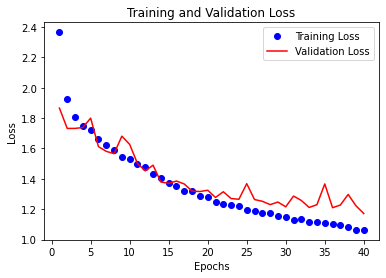

In [7]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

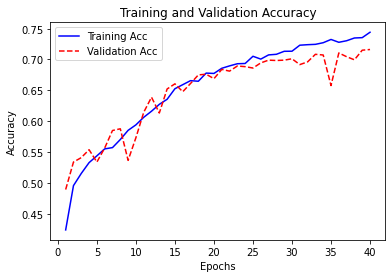

In [8]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()